# 1.Library

## Sun


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import os.path as osp
import torch.utils.data as data
import torch.nn.functional as F

from tqdm import tqdm
import time, matplotlib, torch, os
from statsmodels.tsa.arima_model import ARIMA
from torch.utils.tensorboard import SummaryWriter

In [ ]:
import os
from os import walk

import plotly
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
#import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#For DNN / CNN+LSTM
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Flatten, Dense

In [ ]:
#For SVR
from sklearn.svm import SVR

#For SVM
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
#For ARIMA
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Anthony

In [ ]:
!pip install -q stockstats

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from stockstats import StockDataFrame

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from math import floor

import pandas_datareader.data as web
import pickle

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from stockstats import StockDataFrame

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from math import floor

import pandas_datareader.data as web
import pickle

# 2.Data importing and preprocessing

## Sun

Data Preprocessing

In [1]:
def finder(ds,target):
  for e in ds:
    if code in e:
      return e

def timestamp(i):
  formatted_date = datetime.fromtimestamp(i)
  return formatted_date

Using pandas datareader for analysis

In [2]:
import pandas_datareader.data as web

#Setting the index values as timestamp
def process():
  print("Enter the code of the model that you want to implement")
  df_ = web.DataReader("AAPL", 'stooq')
  #print(f"Loading the dataset for the {code}")

  return df_

In [3]:
#For now, the stock values for Apple (AAPL is returned)
df = process()

Enter the code of the model that you want to implement


In [4]:
def additional_features(df):
  #SMA
  df['10_sma'] = df['Close'].rolling(window=10,min_periods=1).mean()
  df['20_sma'] = df['Close'].rolling(window=20,min_periods=1).mean()
  df['50_sma'] = df['Close'].rolling(window=50,min_periods=1).mean()
  
  #EMA
  df['10_ema'] = df['Close'].ewm(span=10,min_periods=1).mean()
  df['20_ema'] = df['Close'].ewm(span=20,min_periods=1).mean()
  df['50_ema'] = df['Close'].ewm(span=50,min_periods=1).mean()

  #Bollinger
  df['bollinger_mean'] = df['Close'].rolling(20, min_periods=1).mean()
  df['bollinger_std'] = df['Close'].rolling(20, min_periods=1).std()
  df['BOL_UP'] = df['bollinger_mean'] + (2 * df['bollinger_std'])
  df['BOL_DOWN'] = df['bollinger_mean'] - (2 * df['bollinger_std'])
  df["bollinger_gap"] = df["BOL_UP"]-df['BOL_DOWN']
  df.dropna(inplace=True) #Not sure if I can change?

  price_change =  df['Close'].pct_change().fillna(0)
  df['percetage_change'] = price_change

  momentum = [1,1]
  for i in range(2,len(df)):
    momentum.append(1 if df['Close'][i] > df['Close'][i-1] else -1)
  df['momentum'] = momentum

In [5]:
#Print the database for the implementations
additional_features(df)
df.head()

,Open,High,Low,Close,Volume,10_sma,20_sma,50_sma,10_ema,20_ema,50_ema,bollinger_mean,bollinger_std,BOL_UP,BOL_DOWN,bollinger_gap,percetage_change,momentum
Date,,,,,,,,,,,,,,,,,,
2022-04-13,167.39,171.04,166.77,170.40,70618925,167.845000,167.845000,167.845000,168.100500,167.972750,167.896100,167.845000,3.613316,175.071631,160.618369,14.453263,0.000000,1
2022-04-12,168.02,169.87,166.64,167.66,79265181,167.783333,167.783333,167.783333,167.923422,167.857910,167.814231,167.783333,2.557232,172.897796,162.668870,10.228926,-0.016080,1
2022-04-11,168.71,169.03,165.50,165.75,72246706,167.275000,167.275000,167.275000,167.207376,167.249389,167.266806,167.275000,2.322334,171.919667,162.630333,9.289334,-0.011392,-1
2022-04-08,171.78,171.78,169.20,170.09,76575508,167.838000,167.838000,167.838000,168.034899,167.936509,167.877500,167.838000,2.372714,172.583427,163.092573,9.490855,0.026184,1
2022-04-07,171.16,173.36,169.85,172.14,77594650,168.555000,168.555000,168.555000,169.101136,168.823253,168.660813,168.555000,2.754696,174.064392,163.045608,11.018784,0.012052,1


VWAP = (Cumulative (Price * Volume)) / (Cumulative Volume)

Comparison between VWAP of the Tesla share we calculated previously.



In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', '10_sma', '20_sma', '50_sma',
       '10_ema', '20_ema', '50_ema', 'bollinger_mean', 'bollinger_std',
       'BOL_UP', 'BOL_DOWN', 'bollinger_gap', 'percetage_change', 'momentum'],
      dtype='object')

In [8]:
df['Cum_Vol'] = df['Volume'].cumsum()
avg = df['High'] + df['Low'] + df['Close']
df['Cum_Price'] = (df['Volume'] * (avg/3)).cumsum()
df['VWAP'] = df['Cum_Price'] / df['Cum_Vol']

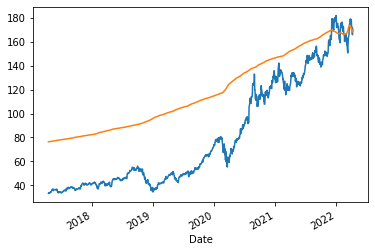

In [12]:
df["Close"].plot.line()
df["VWAP"].plot.line()

Calculating the TWAP

Average of each day’s price = (Open + High + Low + Close)/4

In [13]:
df['TWAP'] = (df['Open']+df["Close"]+df["Low"]+df["High"]) / 4

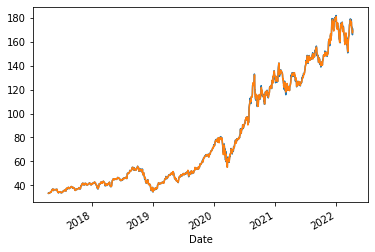

In [14]:
df["Close"].plot.line()
df["TWAP"].plot.line()

Facebook Prophet

In [18]:
# Installation of packages.
!pip install -q Prophet

     |████████████████████████████████| 65 kB 1.7 MB/s 
     |████████████████████████████████| 49 kB 4.3 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640451 sha256=14a303e24c8827ed3547bf42b9031b87e6755d33311fa06bd74ca6709f5d45a4
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [20]:
!pip install -q yfinance

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 34.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [34]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

import yfinance as yf
# Datetime package used for date functions.
from datetime import datetime, timedelta
# Matplotlib package used for altering default plots.
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# Plotly package used for candlestick charts.
import plotly.graph_objects as go


import logging
logging.getLogger("py4j").setLevel(logging.ERROR)


# Select up to yesterday's close - as "close" today is current price if the market hasn't closed.
today = datetime.now() - timedelta( days = 1 )

# Pull information for the FTSE100 index "ticker".
ftse = yf.Ticker( "AAPL" )
ftse_df = ftse.history( start = '2016-01-01', end = today )

# Inspect the dataframe.
ftse_df.head()

# Reset the index to use it as our x variable.
ftse_df.reset_index( inplace=True )
# Create a candlestick chart of the dataset using plotly.graph_objects.
candlestick = go.Figure( data = [go.Candlestick( x = ftse_df['Date'],
                                                 open = ftse_df['Open'],
                                                 high = ftse_df['High'],
                                                 low = ftse_df['Low'],
                                                 close = ftse_df['Close']
                                               ) ] )
# Show the figure.
candlestick.update_xaxes( title_text = 'Date' )
candlestick.update_yaxes( title_text = 'FTSE 100 Index' )
candlestick.show()

In [38]:
ftse_df.head()
ftse_df = ftse_df.rename(columns={"Date":"ds","Close":"y"})

In [39]:
# Select only the 2 columns we want, and rename them appropriately to be passed to Facebook Prophet.
ftse_prophet = ftse_df[['ds','y']]

# Inspect the new dataframe.
ftse_prophet.head()

# Specify a cutoff day range.
days = 60

# Create a cutoff date using the days value.
today = datetime.now()
cutoff_date = today - timedelta( days )

# Use cutoff_date to split our dataset to history and actuals, which we will use to validate the model. 
history_df = ftse_prophet[ftse_prophet['ds'] <= cutoff_date ]
actuals_df = ftse_prophet[ftse_prophet['ds'] > cutoff_date ]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(737060.0, 738260.7092271007)

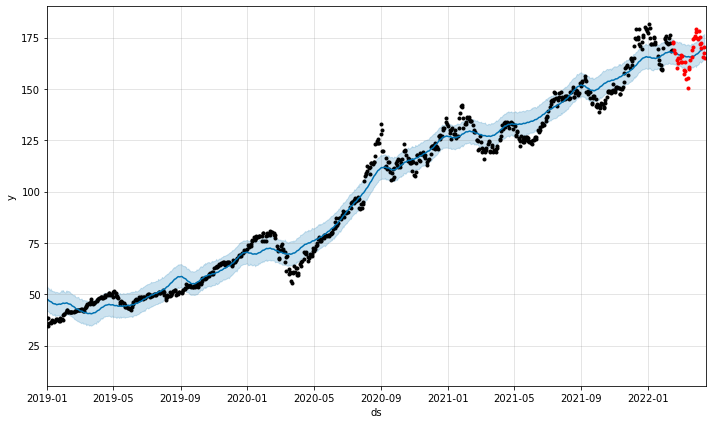

In [40]:
# Define the model - passing no hyperparameters results in a default model being created.
# This is bad practice in reality, but great for showing how simple Prophet is "out of the box".
model = Prophet()

# Fit the model to our history dataset.
model.fit(history_df)

# Create a future dataframe using Prophet's functon make_future_dataframe.
# Remove any non-trading (or similar days) not found in the base dataframe.
future_df = model.make_future_dataframe( periods = days, freq ='d', include_history = True )
future_df = future_df[future_df['ds'].isin( ftse_prophet['ds'] ) ]

# Use the model to predict values for our test dataset.
forecast_df = model.predict( future_df )

# Plot the predictions, and overlay our actuals.
fig = model.plot( forecast_df )
ax = fig.gca()
ax.plot( actuals_df["ds"], actuals_df["y"], 'k.', color = "r" )
ax.set_xlim( [ datetime( 2019, 1, 1 ), today ] )

https://www.investopedia.com/ask/answers/031115/what-common-strategy-traders-implement-when-using-volume-weighted-average-price-vwap.asp

> Indented block



## Additional preprocessing for backtesting

In [ ]:
#Leave olhc
df_olhcv = df[['Open','High','Low','Close','Volume']]
df_olhcv.columns = df_olhcv.columns.str.lower()
df_olhcv.head()

,open,high,low,close,volume
Date,,,,,
2022-04-04,174.57,178.49,174.44,178.44,76545983
2022-04-01,174.03,174.88,171.94,174.31,78751328
2022-03-31,177.84,178.03,174.40,174.61,103049285
2022-03-30,178.55,179.61,176.70,177.77,92633154
2022-03-29,176.69,179.01,176.34,178.96,100589440


In [ ]:
y = StockDataFrame(df_olhcv)
data_bt = y[['open','high','low','close','volume',
          'boll', 'boll_ub', 'boll_lb',
          'macd', 'macdh', 'macds',
          'rsi_11', 'rsi_14', 'rsi_21']]
data_bt.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data_bt.index]
data_bt = data_bt.sort_index()
data_bt.head()

,open,high,low,close,volume,boll,boll_ub,boll_lb,macd,macdh,macds,rsi_11,rsi_14,rsi_21
20170407,33.926,34.030,33.814,33.831,70632950,33.93505,35.063315,32.806785,-0.522774,0.049557,-0.572331,43.731897,42.165654,41.999633
20170410,33.893,33.960,33.729,33.791,70691358,34.04930,35.538299,32.560301,-0.572578,0.012143,-0.584721,42.779156,41.448494,41.565608
20170411,33.739,33.834,33.059,33.428,128704371,34.17730,35.979914,32.374686,-0.623744,-0.035987,-0.587756,33.488086,34.616279,37.524987
20170412,33.421,33.555,33.284,33.471,84222470,34.31455,36.286957,32.342143,-0.643017,-0.064258,-0.578759,34.084066,35.066361,37.820022
20170413,33.498,33.610,33.294,33.294,72623752,34.46530,36.618802,32.311798,-0.662643,-0.099948,-0.562695,29.381066,31.670588,35.842523


In [ ]:
# Split the train and test data
def custom_split(data,start,end):
    train = (data.index >= start) & (data.index <= end)
    train_X = data[train]
    
    return train_X

In [ ]:
start_date = []
num_period = 10
period_year = 1

start = 2022-(num_period+period_year-1)
for i in range(num_period):
    start_date.append((start+i)*10000+101)


date_range_list={}
for i in start_date:
    date_range_list[i] = (i-101)+(period_year-1)*10000+1231

print(date_range_list)

stock_list = {"BlockChain":["COIN","NVDA","FB"],
              "Airline":["BA","GD","LMT",],
              "Traveling":["UBER","ABNB","MAR","BKNG"],
              "Semiconductors":["INTC","NVDA","QCOM","MU","AMD"],
              "Cloud Computing":["IBM", "AMZN","GOOG","CRM"],
              "Social Media":["TWTR","SNAP","PINS","FB"],
              "Entertainment":["DIS","NFLX","FB"],
              "Retail":["WMT","COST","TGT","BBY","HD"],
              "Franchise":["MCD", "YUM", "SBUX", "DPZ"],
              "Real Estate":["HST", "EQR", "AVB", "PLD", "SPG"],
              "Telecommunication":["T","TMUS","VZ","CMCSA","CHTR"],
              "Energy & Resources":["DOW", "DD"],
              "Luxury goods":["RACE","EL","PVH"]
                            }

start_date = "2000-01-01"
end_date = "2022-12-31"


do_nth_name = "Buy&Hold"
model_name = "WithModel"

backtest_col = ["Sector","Stock",
                "Range_Start","Range_End",
                do_nth_name+"_Profit",model_name+"_Profit",
                do_nth_name+"_CAGR(in %)",model_name+"_CAGR(in %)",
                "CAGR_Performance(in %)",
                do_nth_name+"_MDD(in %)",model_name+"_MDD(in %)",
                "MDD_Performance(in %)"]

{20120101: 20121231, 20130101: 20131231, 20140101: 20141231, 20150101: 20151231, 20160101: 20161231, 20170101: 20171231, 20180101: 20181231, 20190101: 20191231, 20200101: 20201231, 20210101: 20211231}


# 3.Models

# Backtesting Module


In [ ]:
################### Input ##########################
# For hist_price_data: index=["date"], columns = ["Open"]
# For pred_action: index=["date"], columns = ["Action"] (Buy/Sell)
################### Output #########################
# 1. trading record
# 2. total profit
class backtest:
    hpd = ""
    pred_action=pd.DataFrame()
    trade_record=pd.DataFrame(index=[],
                              columns=["Action","Price","Position","Cash","Pos_Bal","Cash_Bal","Cum_Profit"],
                             )
    capital = 0
    cash_balance = 0
    profit = 0
    handle_fee = 0
    position = 0
    last_price = 0
    do_nth_profit = 0
    num_year = 0
    _tested = False
    
    _stock_trough = 0
    _stock_peak = 0
    _stock_all_time_low = 0
    _stock_all_time_high = 0
    
    _portfolio_trough = 0
    _portfolio_peak = 0
    _portfolio_all_time_low = 0
    _portfolio_all_time_high = 0
    
    def __init__(self,hist_price_data,pred_action,capital,handling_fee,num_year=1):
        self.hpd = hist_price_data
        self.pred_action = pred_action
        self.capital = capital
        self.cash_balance = capital
        self._portfolio_trough = capital
        self._portfolio_peak = capital
        self._portfolio_all_time_low = capital
        self._portfolio_all_time_high = capital
        self.handle_fee = handling_fee
        self.num_year = num_year
        trade_record=pd.DataFrame(index=[],
                                  columns=["Action","Price","Position","Cash","Pos_Bal","Cash_Bal","Cum_Profit"],
                                 )        
        
    def start_test(self): 
        if not self._tested:  
            self._tested = True
            print("Start Backtesting...")  
            self._stock_all_time_low = self.hpd.iloc[0,0]
            self._stock_all_time_high = self.hpd.iloc[0,0]
            self._stock_trough = self.hpd.iloc[0,0]
            self._stock_peak = self.hpd.iloc[0,0]
            # For loop to iterate the data
            for ind in self.pred_action.index:
                # Update latest price
                self.last_price = self.hpd.loc[ind,"Open"]
                
                # Mark All Time Low,High , Trough and Peak for MDD of stock price (using "Buy&Hold")
                if self.last_price > self._stock_all_time_high:
                    self._stock_all_time_high = self.last_price
                if self.last_price < self._stock_all_time_low:
                    self._stock_all_time_low = self.last_price
                if self.last_price > self._stock_all_time_low and self._stock_trough != self._stock_all_time_low:
                    self._stock_trough = self._stock_all_time_low
                if self.last_price < self._stock_all_time_high and self._stock_peak != self._stock_all_time_high:
                    self._stock_peak = self._stock_all_time_high
                
                # Do the action
                if self.pred_action.loc[ind,"Action"].lower() == "buy":
                    self._buy(ind,self.last_price)
                elif self.pred_action.loc[ind,"Action"].lower() == "sell":
                    self._sell(ind,self.last_price)
                else:
                    #print("Did not buy at " + str(ind))
                    pass
                
                curr_portfolio_val = self.get_capital()+self.get_profit()
                
                # Mark All Time Low,High , Trough and Peak for MDD of our portfolio balance (using our model)
                if curr_portfolio_val > self._portfolio_all_time_high:
                    self._portfolio_all_time_high = curr_portfolio_val
                if curr_portfolio_val < self._portfolio_all_time_low:
                    self._portfolio_all_time_low = curr_portfolio_val
                if curr_portfolio_val > self._portfolio_all_time_low and self._portfolio_trough != self._portfolio_all_time_low:
                    self._portfolio_trough = self._portfolio_all_time_low
                if curr_portfolio_val < self._portfolio_all_time_high and self._portfolio_peak != self._portfolio_all_time_high:
                    self._portfolio_peak = self._portfolio_all_time_high
                            
            # =================================================
            self._run_do_nothing() # Calculate do nothing profit
        else:
            print("Backtesting has been completed...")
              
                
        
    def _mark_down_record(self,date,action,price,pos_delta,cash_delta):
        self.trade_record.loc[date,"Action"] = action
        self.trade_record.loc[date,"Price"] = price
        self.trade_record.loc[date,"Position"] = pos_delta
        self.trade_record.loc[date,"Cash"] = cash_delta
        
        self.trade_record.loc[date,"Pos_Bal"] = round(self.position,4)
        self.trade_record.loc[date,"Cash_Bal"] = round(self.cash_balance,3)
        self.trade_record.loc[date,"Cum_Profit"] = round(self.get_profit(),3)
        
    def _buy(self,date,price):
        # Assume use all money to buy all
        buy_pos = floor(self.cash_balance / price)
        for i in range(buy_pos+1):
            act_buy_pos = buy_pos - i
            if act_buy_pos == 0:
                #print("You do not have enough money to buy!")
                return
            total_amt = act_buy_pos*price*(1+self.handle_fee)
            if self.cash_balance > total_amt:
                self.position += act_buy_pos
                self.cash_balance -= total_amt
                self._mark_down_record(date,
                                       "Buy",
                                       price,
                                       act_buy_pos,
                                       -total_amt)
                print("Bought at",date,"with price =", price, "\tPos:", act_buy_pos)
                return
        
    
    def _sell(self,date,price):
        # Assume sell all position
        sell_pos = self.position
        total_amt = sell_pos*price*(1-self.handle_fee)
        if self.position >= 1:
            self.position -= sell_pos
            self.cash_balance += total_amt
            self._mark_down_record(date,
                                   "Sell",
                                   price,
                                   -sell_pos,
                                   total_amt)
            print("Sold at",date,"with price =", price, "\tPos:", sell_pos)
            
            return

    def _run_do_nothing(self):
        balance = self.capital
        first_day_price = self.hpd.iloc[0,0]
        last_day_price = self.hpd.iloc[-1,0]
        buy_pos = floor(self.capital / first_day_price) # Calculate how many position can buy
        total_amt = buy_pos*first_day_price*(1+self.handle_fee) # Check if okay to buy (including fee)
        while self.capital < total_amt: # If not enough, reduce buy_pos by 1
            buy_pos -= 1
            total_amt = buy_pos*first_day_price*(1+self.handle_fee)
        position = buy_pos # Buy in 
        balance -= total_amt
        self.do_nth_profit = last_day_price*position+balance-self.capital

    def get_performance(self):
        if self._tested:
            model_profit = self.get_profit()
            do_nth_profit = self.get_do_nothing()
            perf = (model_profit-do_nth_profit)/abs(do_nth_profit)
            return perf
        else:
            print("No Backtesting Record.")

    def get_do_nothing(self):
        if self._tested:
            return self.do_nth_profit
        else:
            print("No Backtesting Record.")

    def get_profit(self):
        if self._tested:
            return self.get_cash_balance()+self.get_last_price()*self.get_position()-self.get_capital()
        else:
            print("No Backtesting Record.")

    def get_last_price(self):
        if self._tested:
            return self.last_price
        else:
            print("No Backtesting Record.")
    
    def get_position(self):
        if self._tested:
            return self.position
        else:
            print("No Backtesting Record.")
    
    def get_do_nothing_CAGR(self):
        if self._tested:
            start_bal = self.get_capital()
            end_bal = self.get_do_nothing()+self.get_capital()
            num_year = self.get_num_year()
            return pow(end_bal/start_bal,1/num_year)-1
        else:
            print("No Backtesting Record.")
            
    def get_model_CAGR(self):
        if self._tested:
            start_bal = self.get_capital()
            end_bal = self.get_profit()+self.get_capital()
            num_year = self.get_num_year()
            return pow(end_bal/start_bal,1/num_year)-1
        else:
            print("No Backtesting Record.")
            
    def get_diff_in_CAGR(self):
        if self._tested:
            return self.get_model_CAGR() - self.get_do_nothing_CAGR()
        else:
            print("No Backtesting Record.")
    
    def get_do_nothing_MDD(self):
        if self._tested:
            return (self._stock_trough-self._stock_peak)/self._stock_peak
        else:
            print("No Backtesting Record.")
            
    def get_model_MDD(self):
        if self._tested:
            return (self._portfolio_trough-self._portfolio_peak)/self._portfolio_peak
        else:
            print("No Backtesting Record.")
            
    def get_diff_in_MDD(self):
        if self._tested:
            return self.get_model_MDD() - self.get_do_nothing_MDD()
        else:
            print("No Backtesting Record.")
    
    def get_num_year(self):
        return self.num_year
    
    def get_cash_balance(self):
        return self.cash_balance
    
    def get_capital(self):
        return self.capital
    
    def get_amount(self):
        return self.get_capital()+self.get_profit()

    def print_do_nothing(self):
        if self._tested:
            print("If buy at", self.hpd.index[0],"with price =",self.hpd.iloc[0,0])
            print("and do nothing")
            print("Current Profit:",self.get_do_nothing())
        else:
            print("No Backtesting Record.")
            
    def print_performance(self):
        if self._tested:
            print("Performance:", str(round(self.get_performance()*100,2))+"%")
        else:
            print("No Backtesting Record.")
    
    def print_trade_record(self):
        if self._tested:
            print(self.trade_record)
        else:
            print("No Backtesting Record.")
    
    def print_profit(self):
        if self._tested:
            print("Current Profit with model:",self.get_profit())
        else:
            print("No Backtesting Record.")
    
    def export_trade_record(self,stock,add_msg = ""):
        if self._tested:
            # Save the trade record to the path
            if not add_msg == "":
                add_msg = "_" + add_msg
            self.trade_record.to_csv("trade_record/"+stock+add_msg+".csv")
        else:
            print("No Backtesting Record.")

# Prep

In [ ]:
train_X = custom_split(data_bt,start = 20130101,end = 20171031)
valid_X = custom_split(data_bt,start = 20171101,end = 20181231)
test_X = custom_split(data_bt,start = 20190101,end = 20201231)

In [ ]:
num_day_to_predict = 10
def produce_result_target_price(X,num_day = 10,result_col_name = "result_price"):
    y = pd.DataFrame(np.nan, index=X.index, columns=[result_col_name])
    for i in range(10,len(X)):
        y.loc[X.index[i-1],result_col_name] = X.loc[X.index[i],"open"]
    
    return y
train_y = produce_result_target_price(train_X,num_day_to_predict)
valid_y = produce_result_target_price(valid_X,num_day_to_predict)
test_y = produce_result_target_price(test_X,num_day_to_predict)

In [ ]:
def transform_x_data_to_one_vector(X,num_day = 10):
    col_name = []
    for i in range(num_day):
        for j in X.columns:
            col_name.append(j+"-"+str(i))
    new_X = pd.DataFrame(np.nan, index=X.index, columns=col_name)
    
    for i in range(len(X)-9):
        for col in col_name:
            split_list = col.split("-")
            new_X.loc[X.index[i],col] = X.loc[X.index[i+int(split_list[1])],split_list[0]]
    
    return new_X

train_X_10 = transform_x_data_to_one_vector(train_X,num_day_to_predict)
valid_X_10 = transform_x_data_to_one_vector(valid_X,num_day_to_predict)
test_X_10 = transform_x_data_to_one_vector(test_X,num_day_to_predict)

In [ ]:
def drop_nan_row_y(y,num_day = 10):
    drop_list = [y.index[i] for i in range(num_day-1)]
    drop_list.append(y.index[-1])
    return y.drop(drop_list)

def drop_nan_row_X_10(X,num_day = 10):
    drop_list = [X.index[-i] for i in range(1,num_day+1)]
    return X.drop(drop_list)
def normalize_data_by_row(X,y):
    norm_X = X.sub(X.mean(axis=0), axis=1).div(X.std(axis=0), axis=1)
    
    col_list =[] 
    for col in X.columns:
        if "open" in col:
            col_list.append(col)
    
    temp_y = y.loc[:,"result_price"]
    mean_10_day = np.mean(X.loc[:,col_list],axis=1)
    mean_10_day.index = temp_y.index
    std_10_day = np.std(X.loc[:,col_list],axis=1)
    std_10_day.index = temp_y.index

    norm_y = pd.DataFrame((temp_y-mean_10_day)/std_10_day,
                          columns=["result_price"])
                         
    return (norm_X,norm_y)


new_train_X_10 = drop_nan_row_X_10(train_X_10,num_day_to_predict)
new_train_y = drop_nan_row_y(train_y,num_day_to_predict)

new_valid_X_10  = drop_nan_row_X_10(valid_X_10,num_day_to_predict)
new_valid_y = drop_nan_row_y(valid_y,num_day_to_predict)

new_test_X_10  = drop_nan_row_X_10(test_X_10,num_day_to_predict)
new_test_y = drop_nan_row_y(test_y,num_day_to_predict)

# Keep a copy for reverting prediction result
old_train_X_10 = new_train_X_10
old_train_y = new_train_y
old_valid_X_10 = new_valid_X_10
old_valid_y = new_valid_y
old_test_X_10 = new_test_X_10
old_test_y = new_test_y

new_train_X_10,new_train_y = normalize_data_by_row(new_train_X_10,new_train_y)
new_valid_X_10,new_valid_y = normalize_data_by_row(new_valid_X_10,new_valid_y)
new_test_X_10,new_test_y = normalize_data_by_row(new_test_X_10,new_test_y)

## Model 1 - SVR

Given data type - df and data_bt

### Training

In [ ]:
from sklearn.svm import SVR

def svr_func(df_):
  train_df = df_
  #Data Preprocessing
  train_df_svr = train_df.head(len(train_df)-1) 
  days = train_df_svr.index.tolist()
  days = [[i] for i in days]
  #adj_prices = [[i] for i in adj_prices]
  adj_prices = train_df_svr['Close'].tolist()
  train_X, test_X, train_y, test_y = train_test_split(days, adj_prices, test_size=0.25)

  #SVR Models-1
  #lin_svr = SVR(kernel='linear',C=1000.0)
  #lin_svr.fit(train_X,train_y)

  #SVR Models-2
  poly_svr = SVR(kernel='poly',C=1000.0, degree=2)
  poly_svr.fit(train_X,train_y)

  #SVR Models-3
  rbf_svr = SVR(kernel='rbf',C=1000.0, gamma = 0.15)
  rbf_svr.fit(train_X,train_y)

  #performance evaluation

  print("Pure prediction section")
  print("Actual score - poly")
  print(poly_svr.score(test_X, test_y))
  print("Actual score - rbf")
  print(rbf_svr.score(test_X, test_y))

  print("------------------------------------")
  #svr_list = [lin_svr,poly_svr,rbf_svr]
  svr_list = [poly_svr,rbf_svr]
  for svr in svr_list:
    svr_predict = svr.predict(test_X)

    print('SVR {} PERFORMANCE'.format(str(svr)))
    print('r2 score: '+str(r2_score(test_y, svr_predict)))
    print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, svr_predict))))
    print("Mean Absolute Error : " + str(mean_absolute_error(test_y,svr_predict)))


def svm_func(df_):

  print("Momentum prediction - as classifier")

  length = len(df)

  X = np.transpose(np.array([df['percetage_change'],df['bollinger_gap'],df['bollinger_mean'],df['bollinger_std']]))
  Y = np.array(df['momentum'])

  X_train = X[0:int(0.8*length)]
  X_test = X[int(0.8*length):]
  y_train = Y[0:int(0.8*length)]
  y_test = Y[int(0.8*length):]


  poly_svm = svm.SVC(kernel='poly')
  poly_svm.fit(X_train, y_train)
  poly_score = poly_svm.score(X_test, y_test)
  print("Prediction score for poly SVM classifier : ",poly_score)

  rbf_svm = svm.SVC(kernel='rbf')
  rbf_svm.fit(X_train, y_train)
  rbf_score = rbf_svm.score(X_test, y_test)
  print("Prediction score for RBF SVM classifier : ",rbf_score)



In [ ]:
df_temp = df
df_temp = df_temp.reset_index()

In [ ]:
import pandas as pd
from sklearn import svm

svr_func(df_temp)

Pure prediction section
Actual score - poly
0.675396927975342
Actual score - rbf
0.9930409530755321
------------------------------------
SVR SVR(C=1000.0, degree=2, kernel='poly') PERFORMANCE
r2 score: 0.675396927975342
RMSE : 24.771036308321445
Mean Absolute Error : 20.911135226159512
SVR SVR(C=1000.0, gamma=0.15) PERFORMANCE
r2 score: 0.9930409530755321
RMSE : 3.6269598291741314
Mean Absolute Error : 2.090205215139102


In [ ]:
svm_func(df_temp)

Momentum prediction - as classifier
Prediction score for poly SVM classifier :  0.5198412698412699
Prediction score for RBF SVM classifier :  0.5198412698412699


In [ ]:
df_temp.head()

,Date,Open,High,Low,Close,Volume,10_sma,20_sma,50_sma,10_ema,20_ema,50_ema,bollinger_mean,bollinger_std,BOL_UP,BOL_DOWN,bollinger_gap,percetage_change,momentum
0,2022-04-04,174.57,178.49,174.44,178.44,76545983,176.750000,176.750000,176.750000,176.919000,176.834500,176.783800,176.750000,2.390021,181.530042,171.969958,9.560084,0.000000,1
1,2022-04-01,174.03,174.88,171.94,174.31,78751328,175.936667,175.936667,175.936667,175.870199,175.907519,175.926001,175.936667,2.200144,180.336955,171.536379,8.800576,-0.023145,1
2,2022-03-31,177.84,178.03,174.40,174.61,103049285,175.605000,175.605000,175.605000,175.455020,175.532945,175.577003,175.605000,1.914967,179.434935,171.775065,7.659869,0.001721,1
3,2022-03-30,178.55,179.61,176.70,177.77,92633154,176.038000,176.038000,176.038000,176.119588,176.074070,176.051377,176.038000,1.920357,179.878713,172.197287,7.681427,0.018097,1
4,2022-03-29,176.69,179.01,176.34,178.96,100589440,176.525000,176.525000,176.525000,176.857341,176.682869,176.585890,176.525000,2.091227,180.707454,172.342546,8.364908,0.006694,1


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

length = len(df_temp)

X = np.transpose(np.array([df['percetage_change'],df['bollinger_gap'],df['bollinger_mean'],df['bollinger_std']]))
Y = np.array(df['momentum'])

train_X, val_X, train_y, val_y = train_test_split(X, Y,random_state = 1002)

tuned_parameters = [{'kernel': ['poly', 'rbf'],'C': [1,100,1000]}]#,'gamma' : [0.00005,0.0001,0.0005]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy')
clf.fit(train_X, train_y)

clf.best_params_

{'C': 1000, 'kernel': 'poly'}

### Saving the model for backtesting

In [ ]:
def convert_prediction(X,y,pred):
    col_list =[] 
    for col in X.columns:
        if "open" in col:
            col_list.append(col)
        
    mean_10_day = np.mean(X.loc[:,col_list],axis=1)
    mean_10_day.index = y.index
    std_10_day = np.std(X.loc[:,col_list],axis=1)
    std_10_day.index = y.index
    a = pd.DataFrame(index = y.index,columns=['mean','std','pred'])
    a.loc[:,"mean"] = mean_10_day
    a.loc[:,"std"] = std_10_day
    a.loc[:,"pred"] = pred
    a.loc[:,"converted"] = pred*std_10_day+mean_10_day
    return a

In [ ]:
#original
svr_final = SVR(**clf.best_params_)
svr_final.fit(train_X, train_y)

svr_prediction = svr_final.predict(val_X)
svr_confidence = svr_final.score(val_X, val_y)
print("svr confidence:", svr_confidence)

with open('svr_final.pickle', 'wb') as f:
    pickle.dump(svr_final, f)

In [ ]:
svr_final = SVR(**clf.best_params_)
svr_final.fit(new_train_X_10, new_train_y)

svr_prediction = svr_final.predict(new_test_X_10)
svr_confidence = svr_final.score(new_test_X_10, new_test_y)
print("svr confidence:", svr_confidence)

with open('svr_final.pickle', 'wb') as f:
    pickle.dump(svr_final, f)

svr confidence: -0.30087677894573606


### Backtesting

In [ ]:
#### SVR Backtest
backtest_summary = pd.DataFrame(columns=backtest_col)

for sector, stocks in stock_list.items():
    for stock in stocks:
        print("Runninng stock: "+ stock)
        stock_data_1 = web.DataReader(stock, "stooq",start=start_date, end=end_date)
        stock_data_1.columns = ["open","high","low","close","volume"]
        x_1 = StockDataFrame(stock_data_1)
        data_1 = x_1[['open','high','low','close','volume',
                      'boll', 'boll_ub', 'boll_lb',
                      'macd', 'macdh', 'macds',
                      'rsi_11', 'rsi_14', 'rsi_21']]
        data_1.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data_1.index]
        data_1 = data_1.sort_index()
        print(stock + " Data loaded...")
        for k,v in date_range_list.items():
            
            print("Getting Data... - " + stock + " from " + str(k))
            if (data_1.index[0]>v):
                print("No data for this testing period... - " + stock + " from " + str(k))
                continue
            test_X = custom_split(data_1,start = k,end = v)
            if len(test_X) <= 10:
                print("No enoguh data for testing... - " + stock + " from " + str(k))
                continue
                
            print("Transforming Data... - " + stock + " from " + str(k))
            test_y = produce_result_target_price(test_X,num_day_to_predict)
            test_X_10 = transform_x_data_to_one_vector(test_X,num_day_to_predict)
            new_test_X_10  = drop_nan_row_X_10(test_X_10,num_day_to_predict)
            new_test_y = drop_nan_row_y(test_y,num_day_to_predict)
            old_test_X_10 = new_test_X_10.copy()
            old_test_y = new_test_y.copy()
            new_test_X_10,new_test_y = normalize_data_by_row(new_test_X_10,new_test_y)
            
            print("Predicting... - " + stock + " from " + str(k))
            svr_prediction = svr_final.predict(new_test_X_10)
            
            print("Converting... - " + stock + " from " + str(k))
            pred_df = convert_prediction(old_test_X_10,old_test_y,svr_prediction)
            converted_pred = pred_df.loc[:,"converted"]
            pred_df["Action"] = pred_df.apply(lambda row: "Buy" if row["converted"] > row["mean"] else "Sell", axis=1)
            final_pred = pred_df.drop(columns=["mean","std","pred","converted"])
            final_test_y = old_test_y.rename(columns={"result_price":"Open"})
            
            print("Backtesting... - " + stock + " from " + str(k))
            back1 = backtest(final_test_y,final_pred,10000,0.0005,period_year)
            
            print("Start Iteration... - " + stock + " from " + str(k))
            back1.start_test()
            
            print("======= from "+ str(k) + " to " + str(v)+" =========")
            print(back1)
            back1.print_do_nothing()
            back1.print_profit()
            back1.print_performance()
            #back1.export_trade_record("SVR_"+sector+"-"+stock,str(k)+"-to-"+str(v)+"("+str(round(back1.get_performance()*100,2))+"%)")
            backtest_summary = backtest_summary.append({"Sector":sector,
                                                        "Stock":stock,
                                                        "Range_Start":str(k),
                                                        "Range_End":str(v),
                                                        do_nth_name+"_Profit":round(back1.get_do_nothing(),2),
                                                        model_name+"_Profit":round(back1.get_profit(),2),
                                                        do_nth_name+"_CAGR(in %)":round(back1.get_do_nothing_CAGR()*100,2),
                                                        model_name+"_CAGR(in %)":round(back1.get_model_CAGR()*100,2),
                                                        "CAGR_Performance(in %)":round(back1.get_diff_in_CAGR()*100,2),
                                                        do_nth_name+"_MDD(in %)":round(back1.get_do_nothing_MDD()*100,2),
                                                        model_name+"_MDD(in %)":round(back1.get_model_MDD()*100,2),
                                                        "MDD_Performance(in %)":round(back1.get_diff_in_MDD()*100,2)}, ignore_index=True)
            print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

print("Backtesting Completed...")
backtest_summary.to_csv("backtest_summary_SVR.csv")

Runninng stock: COIN
COIN Data loaded...
Getting Data... - COIN from 20120101
No data for this testing period... - COIN from 20120101
Getting Data... - COIN from 20130101
No data for this testing period... - COIN from 20130101
Getting Data... - COIN from 20140101
No data for this testing period... - COIN from 20140101
Getting Data... - COIN from 20150101
No data for this testing period... - COIN from 20150101
Getting Data... - COIN from 20160101
No data for this testing period... - COIN from 20160101
Getting Data... - COIN from 20170101
No data for this testing period... - COIN from 20170101
Getting Data... - COIN from 20180101
No data for this testing period... - COIN from 20180101
Getting Data... - COIN from 20190101
No data for this testing period... - COIN from 20190101
Getting Data... - COIN from 20200101
No data for this testing period... - COIN from 20200101
Getting Data... - COIN from 20210101
Transforming Data... - COIN from 20210101
Predicting... - COIN from 20210101


ValueError: ignored

# Sun

## DNN Model(pure)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#Data Pre-processing
train_df = df

X = train_df[['Open','High','Low','Volume']]
Y = train_df[['Close']]

X_scaler = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = X_scaler.fit_transform(X[X.columns])
X = X.fillna(X.median())

Y_scaler = MinMaxScaler(feature_range=(0, 1))
Y[Y.columns] = Y_scaler.fit_transform(Y[Y.columns])
Y = Y.fillna(Y.median())

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.25)

In [ ]:
#Model
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=(4,)),
        layers.Dense(128, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(1,activation="linear", name="layer3")
    ]
)

model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(train_X,train_y,validation_data=(val_X, val_y),epochs = 200 ,batch_size = 10,verbose=False)

Text(0.5, 1.0, 'Simple DNN Architecture')

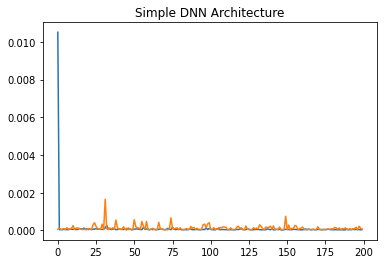

In [ ]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();
history_df['val_loss'].plot();
plt.title("Simple DNN Architecture")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 layer1 (Dense)              (None, 128)               8320      
                                                                 
 layer2 (Dense)              (None, 256)               33024     
                                                                 
 layer3 (Dense)              (None, 1)                 257       
                                                                 
Total params: 41,921
Trainable params: 41,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:


dnn_predict = model.predict(test_X)

print('SIMPLE DNN PERFORMANCE')
print('r2 score: '+str(r2_score(test_y, dnn_predict)))
print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, dnn_predict))))
print("Mean Absolute Error : " + str(mean_absolute_error(test_y,dnn_predict)))

SIMPLE DNN PERFORMANCE
r2 score: 0.9996754475781743
RMSE : 0.005410838405320905
Mean Absolute Error : 0.0035528548479391324


Complex DNN Model

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.25)
train_X,val_X,train_y,val_y = train_test_split(train_X, train_y, test_size=0.25)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium change considered improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

#train_X, test_X, train_y, test_y
model = keras.Sequential([
    layers.Dense(units=1024, input_shape=[len(train_X.columns)]),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1)

])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=True
)

Epoch 1/200
3/3 [==============================] - 2s 222ms/step - loss: 1.6734 - val_loss: 0.3774
Epoch 2/200
3/3 [==============================] - 0s 101ms/step - loss: 1.0337 - val_loss: 0.2905
Epoch 3/200
3/3 [==============================] - 0s 74ms/step - loss: 0.8211 - val_loss: 0.3330
Epoch 4/200
3/3 [==============================] - 0s 92ms/step - loss: 0.7234 - val_loss: 0.2897
Epoch 5/200
3/3 [==============================] - 0s 81ms/step - loss: 0.7210 - val_loss: 0.2700
Epoch 6/200
3/3 [==============================] - 0s 102ms/step - loss: 0.6365 - val_loss: 0.2658
Epoch 7/200
3/3 [==============================] - 0s 94ms/step - loss: 0.5628 - val_loss: 0.2517
Epoch 8/200
3/3 [==============================] - 0s 81ms/step - loss: 0.5692 - val_loss: 0.2660
Epoch 9/200
3/3 [==============================] - 0s 100ms/step - loss: 0.5588 - val_loss: 0.2576
Epoch 10/200
3/3 [==============================] - 0s 95ms/step - loss: 0.5520 - val_loss: 0.2572
Epoch 11/200
3/

Text(0.5, 1.0, 'Complex DNN Structure')

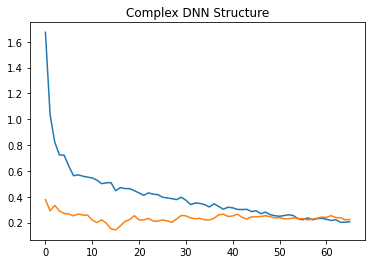

In [ ]:
#Expressing the loss - underfitting
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();
history_df['val_loss'].plot();
plt.title("Complex DNN Structure")

XGBoost

In [ ]:
from xgboost import XGBRegressor

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)
model = XGBRegressor(learning_rate = 0.01,n_estimators=1000)

model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)
xgb_pred_y = model.predict(test_X)

[07:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Performance evaluation
print('XGBOOST PERFORMANCE')
print('r2 score: '+str(r2_score(test_y, xgb_pred_y)))
print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, xgb_pred_y))))
print("Mean Absolute Error : " + str(mean_absolute_error(test_y,xgb_pred_y)))

XGBOOST PERFORMANCE
r2 score: 0.9995931538841413
RMSE : 0.006101753965864681
Mean Absolute Error : 0.0037832014533906062


CatBoost

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 50 kB/s 


In [ ]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(random_state=1002,logging_level='Silent')

model_cat.fit(train_X, train_y, plot=True)
pred_cat = model_cat.predict(test_X, verbose=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
#Performance evaluation
print('CATBoost PERFORMANCE')
print('r2 score: '+str(r2_score(test_y, pred_cat)))
print('RMSE : '+str(np.sqrt(mean_squared_error(test_y, pred_cat))))
print("Mean Absolute Error : " + str(mean_absolute_error(test_y,pred_cat)))

CATBoost PERFORMANCE
r2 score: 0.9995602353314914
RMSE : 0.006343804230693282
Mean Absolute Error : 0.004174683299969427


ARIMA

ARIMA - Auto Regression Integrated Moving Average (AR, I, MA)

**p**: order of the autoregressive model (how lagged it is) -> # of preceding Y values that needs to be added

**d**: degree of differencing (How much the value is different from the previous) -> d until it makes data stationary (const variance)

e.g. 

If d=1:  yt  =  Yt - Yt-1

If d=2:  yt  =  (Yt - Yt-1) - (Yt-1 - Yt-2)  = Yt - 2Yt-1 + Yt-2

**q** : Order of moving average (MA) - error terms (adding the noise)

Criteria 

- ACF,PACF graph : appropriateness of the model
- AIC : Lowest
- BIC : Lowest

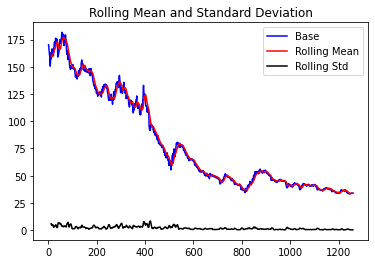

Results of dickey fuller test
Test Statistics           -1.637066
p-value                    0.463794
# lags                    20.000000
# observations used     1236.000000
critical value (1%)       -3.435652
critical value (5%)       -2.863881
critical value (10%)      -2.568016
dtype: float64


In [ ]:
df_close = df['Close']

#For the ADF test

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #window size 12 mean

    rolstd = timeseries.rolling(12).std() #windoiw size 12 std
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Base')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    # Resulting test statistics, p-value, lags used and number of observation
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','# lags','# observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

Unit Root Test : Time Series y_t = D_t + z_t + e_t

D_t : Deterministic (trend,season)
z_t : stochastic (random walk with a drift) testing this part
e_t : stationary error
Model with unit root has a "spike and shocks" = high unit root means highly stochastic

Critical value (1%,5%,10% C.I) < Test Statistics

H_0 : (O) unit root exists vs H_a : (X) unit root does not exist

NOT Stationary

In [ ]:
#The data is non-linear
#Analyzing the Close, Trend, and seasonality
result = seasonal_decompose(df_close, model='multiplicative', period = 30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 8)

TypeError: ignored

Based on the graph above, it is evident that there is a downward trend in Close price, meaning that the data is **not stationary**

- mean should be stationary over time
- variance should not be function of time (homoscedasticity)
-covariance should not be function of time



Methods to make data stationary : https://people.duke.edu/~rnau/whatuse.htm

In [ ]:
#Log,Differencing to make it stationary - Transformations such as logarithms can help to stabilise the variance of a time series. 
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

#Separating the training and testing
train_data, test_data = df_log[:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

Autocorrelation : relationship between the lags (serial correlation)
- X axis : # of lags
- Y axis : Moran's I (how one is similar to surrounding)

Below

- ACF : Quite close to one another and is all in one side
-PACF : Part of y(t) vs y(t-2) not explained by y(t-1)

AR : ACF decrease slowly & PACF sharp drop

MA : ACF sharp drop & PACF gradual decline

ARMA : moth ACF & PACF decrease

e.g. 둘 다 서서히 줄어들면 ARMA(1,1), ACF에서 두번 쭉 떨어지면 MA(2)

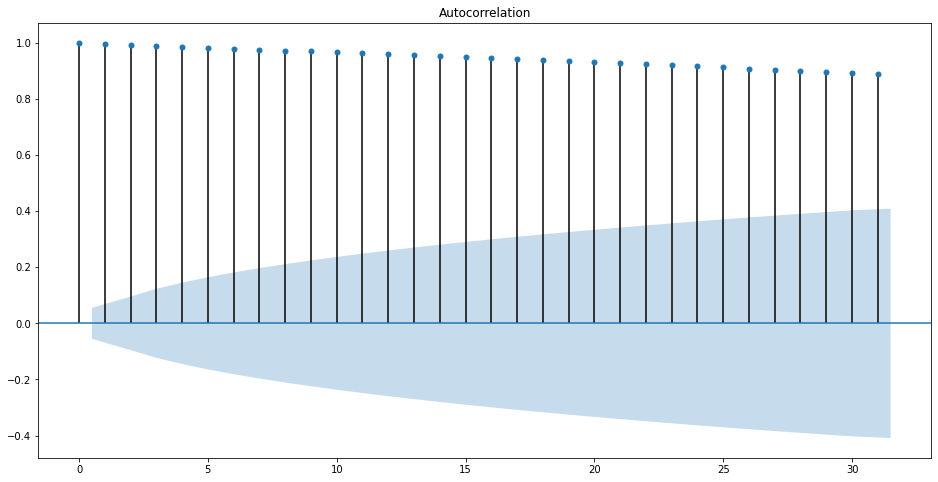

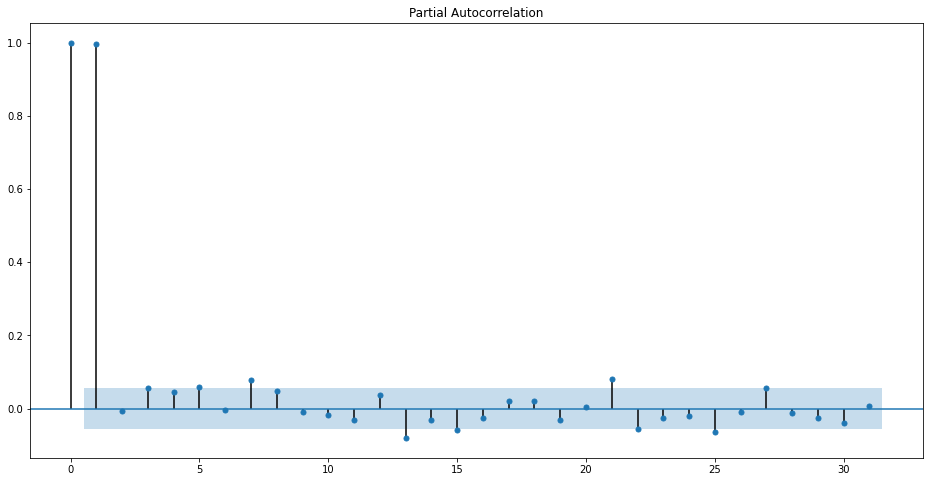

In [ ]:
#Auto-correlation
plt.rcParams["figure.figsize"] = (16,8)
plot_acf(Y**2)
plt.show()

#Partial Auto-correlation
plot_pacf(Y**2)
plt.show()

In [ ]:
#Selecting the mest ARIMA combination
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())

model_autoARIMA.plot_diagnostics(figsize=(15,8))

plt.show()


NameError: ignored

Reference: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.plot_diagnostics.html

Produces a 2x2 plot grid with the following plots (ordered clockwise from top left):

1. Standardized residuals over time

2. Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference. (KDE - Epanechnikov kernel function)

3. Normal Q-Q plot, with Normal reference line. (finding the apt distribution)

4. Correlogram

In [ ]:
!pip install statsmodels

In [ ]:
#As expected, better to use the AR > MA focused model
#Best model:  ARIMA(9,1,0)(0,0,0)[0]

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data, order=(9,1,0))  
arima_model = model.fit()

print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1130
Model:                 ARIMA(9, 1, 0)   Log Likelihood                2833.789
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sun, 27 Mar 2022   AIC                          -5645.578
Time:                        08:12:31   BIC                          -5590.248
Sample:                             1   HQIC                         -5624.674
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0014      0.001     -2.410      0.016      -0.002      -0.000
ar.L1.D.Close    -0.0866      0.030     -2.924      0.004      -0.145      -0.029
ar.L2.D.Close    -0.0043      0.030     

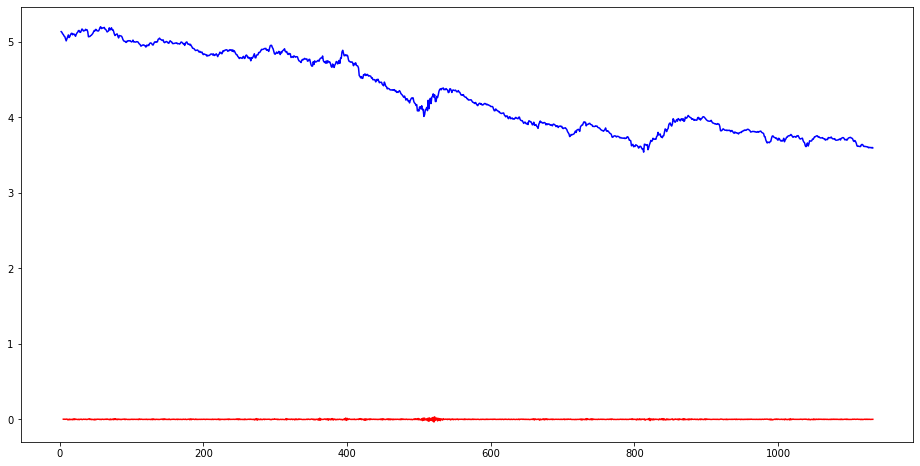

In [ ]:
#train,test -> after the log / difference
plt.plot(train_data,color='blue')

model = ARIMA(train_data[1:], order=(9,1,0))
results = model.fit()
plt.plot(results.fittedvalues[1:], color='red')

In [ ]:
model = ARIMA(train_data, order=(9,1,0))

In [ ]:
r = model.fit()

ValueError: ignored

In [ ]:
x = r.predict(start=len(train_data),end=len(df))

NameError: ignored

NameError: ignored

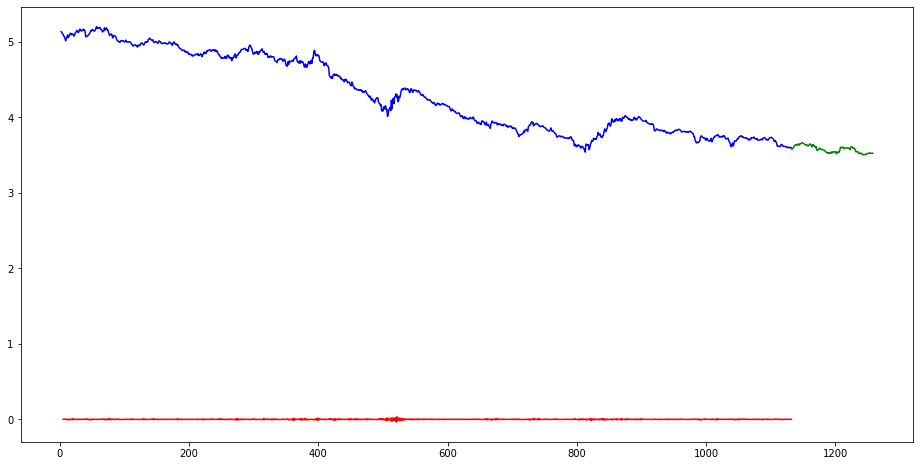

In [ ]:
plt.plot(train_data,color='blue')
plt.plot(results.fittedvalues[1:], color='red')
plt.plot(test_data,color='green')
plt.plot(x,color='orange')

Autoregressive models are used for 
1. Stationary (AR)
2. Trend (ARIMA)
3. Seasonality (SARIMA)


ARCH - AR(p) model applied to variance of time series


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

final_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,random_state=0))
                             ])
# cv returns negative MAE, so *-1
scores = -1 * cross_val_score(final_pipeline, X, Y,
                              cv=5, #how many partitions they have
                              scoring='neg_mean_absolute_error')

In [ ]:
scores

array([0.077025  , 0.02609193, 0.00329158, 0.00198703, 0.00303056])

CNN + LSTM

### 3 e) CNN + LSTM

Reference : https://machinelearningmastery.com/cnn-long-short-term-memory-networks/

### define CNN model
cnn = Sequential()

cnn.add(Conv2D(...))

cnn.add(MaxPooling2D(...))

cnn.add(Flatten())
### define LSTM model
model = Sequential()

model.add(TimeDistributed(cnn, ...))

model.add(LSTM(..))

model.add(Dense(...))